## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-006-001A-k-Nearest-Neighbor

In [1]:
from sklearn.neighbors import NearestNeighbors

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import matplotlib._color_data as mcd

In [2]:
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [3]:
np.version.version

'1.16.4'

In [4]:
mpl.__version__

'3.1.0'

In [5]:
ncnt1=4
ncnt2=8

In [6]:
np.random.seed(1968)

In [7]:
colors1 = np.array(list(sorted({name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}, reverse=False)))
colors0 = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
colors=np.concatenate((colors0,colors1), axis=0)
colors

array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'aquamarine', 'azure',
       'beige', 'black', 'blue', 'brown', 'chartreuse', 'chocolate',
       'coral', 'crimson', 'cyan', 'darkblue', 'darkgreen', 'fuchsia',
       'gold', 'goldenrod', 'green', 'grey', 'indigo', 'ivory', 'khaki',
       'lavender', 'lightblue', 'lightgreen', 'lime', 'magenta', 'maroon',
       'navy', 'olive', 'orange', 'orangered', 'orchid', 'pink', 'plum',
       'purple', 'red', 'salmon', 'sienna', 'silver', 'tan', 'teal',
       'tomato', 'turquoise', 'violet', 'wheat', 'white', 'yellow',
       'yellowgreen'], dtype='<U11')

In [8]:
size = int(1E2)
size

100

In [9]:
step=int(size/20)
if step < 1:
    step = 1
step

5

In [10]:
a=np.arange(-size, size, step)
a

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95])

In [11]:
#b=np.arange(-size, size, step)
b=np.random.randint(int(size/10), size=int((size*2)/step))
b

array([5, 4, 0, 9, 5, 0, 6, 7, 6, 8, 7, 7, 4, 0, 5, 5, 0, 4, 4, 5, 4, 0,
       9, 4, 7, 9, 5, 3, 5, 0, 7, 4, 6, 0, 5, 2, 2, 5, 1, 4])

In [12]:
X = np.stack((a, b), axis=-1)
X.shape

(40, 2)

In [13]:
nbrs1 = NearestNeighbors(n_neighbors=ncnt1, 
                        algorithm='ball_tree'
                       ).fit(X)

distances1, indices1 = nbrs1.kneighbors(X)

n1=nbrs1.kneighbors_graph(X).toarray()

In [14]:
print('Indices')
print('---------------')
print(indices1)
print('Distances')
print('---------------')
print(distances1)

print('K-neighbors')
print('---------------')
print(n1)

Indices
---------------
[[ 0  1  2  3]
 [ 1  0  2  3]
 [ 2  1  3  0]
 [ 3  4  2  1]
 [ 4  3  5  6]
 [ 5  4  6  7]
 [ 6  7  5  8]
 [ 7  8  6  9]
 [ 8  7  9  6]
 [ 9 10  8  7]
 [10 11  9  8]
 [11 10 12  9]
 [12 11 13 14]
 [13 12 14 15]
 [14 15 13 12]
 [15 14 16 17]
 [16 17 15 18]
 [17 18 16 15]
 [18 17 19 20]
 [19 20 18 17]
 [20 19 21 18]
 [21 20 22 23]
 [22 23 24 21]
 [23 24 22 21]
 [24 25 23 22]
 [25 24 26 23]
 [26 27 25 28]
 [27 26 28 29]
 [28 27 29 26]
 [29 28 30 27]
 [30 31 29 32]
 [31 32 30 29]
 [32 31 33 30]
 [33 34 32 35]
 [34 35 33 32]
 [35 36 34 33]
 [36 35 37 38]
 [37 36 38 39]
 [38 39 37 36]
 [39 38 37 36]]
Distances
---------------
[[ 0.          5.09901951 11.18033989 15.5241747 ]
 [ 0.          5.09901951  6.40312424 11.18033989]
 [ 0.          6.40312424 10.29563014 11.18033989]
 [ 0.          6.40312424 10.29563014 11.18033989]
 [ 0.          6.40312424  7.07106781 10.04987562]
 [ 0.          7.07106781  7.81024968 12.20655562]
 [ 0.          5.09901951  7.81024968 10.  

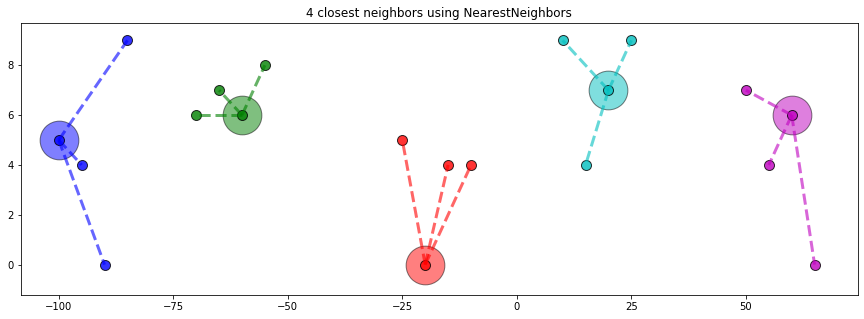

In [15]:
fig1=plt.figure(figsize=(15, 5))
titlename = '%d closest neighbors using NearestNeighbors' % (ncnt1)
plt.title(titlename)
k=-1
for p in range(0,n1.shape[0],int(n1.shape[0]/5)):  
    l=n1[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p][0], 
                X[p][1], 
                marker='o', 
                s=1500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i][0], 
                        X[i][1], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot([X[p][0],X[i][0]], 
                     [X[p][1],X[i][1]],
                     c=c,
                     alpha=0.6,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.show()

In [16]:
nbrs2 = NearestNeighbors(n_neighbors=ncnt2, 
                        algorithm='ball_tree'
                       ).fit(X)

distances2, indices2 = nbrs2.kneighbors(X)

n2=nbrs2.kneighbors_graph(X).toarray()

In [17]:
print('Indices')
print('---------------')
print(indices2)
print('Distances')
print('---------------')
print(distances2)

print('K-neighbors')
print('---------------')
print(n2)

Indices
---------------
[[ 0  1  2  3  4  5  6  7]
 [ 1  0  2  3  4  5  6  7]
 [ 2  1  3  4  0  5  6  7]
 [ 3  4  2  1  5  6  0  7]
 [ 4  3  5  6  2  1  7  0]
 [ 5  4  6  7  3  2  8  1]
 [ 6  7  5  8  4  9  3 10]
 [ 7  8  6  9  5 10  4 11]
 [ 8  7  9  6 10 11  5  4]
 [ 9 10  8  7 11  6 12  5]
 [10 11  9  8 12  7 13  6]
 [11 10 12  9 13  8 14  7]
 [12 11 13 14 10 15  9  8]
 [13 12 14 15 11 16 10 17]
 [14 15 13 12 16 17 11 18]
 [15 14 16 17 13 18 12 19]
 [16 17 15 18 14 13 19 12]
 [17 18 16 15 19 20 14 13]
 [18 17 19 20 16 15 21 14]
 [19 18 20 17 21 22 16 15]
 [20 19 21 18 22 17 23 24]
 [21 20 22 23 19 18 24 17]
 [22 23 24 21 20 25 19 26]
 [23 24 22 21 25 20 26 19]
 [24 25 23 26 22 27 21 28]
 [25 24 26 23 27 22 28 21]
 [26 27 25 28 24 23 29 30]
 [27 28 26 29 25 24 30 23]
 [28 27 29 26 30 31 25 32]
 [29 28 30 27 31 26 32 33]
 [30 31 29 32 28 27 33 26]
 [31 32 30 29 33 28 34 27]
 [32 31 33 34 30 35 29 28]
 [33 34 32 35 31 36 30 29]
 [34 35 33 32 36 37 31 30]
 [35 36 34 33 37 38 32 31]
 [36

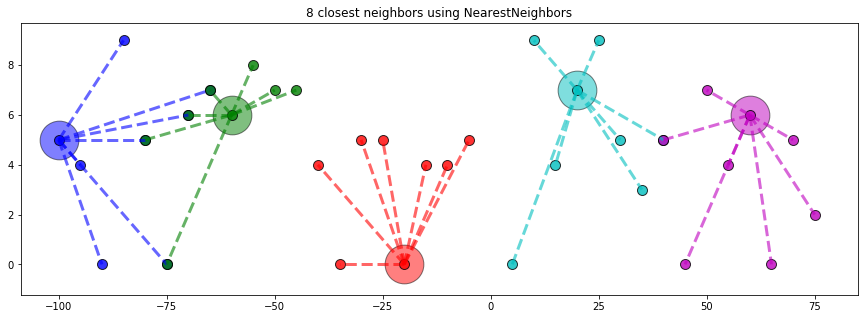

In [18]:
fig2=plt.figure(figsize=(15, 5))
titlename = '%d closest neighbors using NearestNeighbors' % (ncnt2)
plt.title(titlename)
k=-1
for p in range(0,n2.shape[0],int(n2.shape[0]/5)):
    l=n2[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p][0], 
                X[p][1], 
                marker='o', 
                s=1500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i][0], 
                        X[i][1], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot([X[p][0],X[i][0]], 
                     [X[p][1],X[i][1]],
                     c=c,
                     alpha=0.6,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )


plt.show()

In [19]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001A-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')     
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001A-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 06


## Done

In [20]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 19:45:40.467034
